# Data Visualization With Seaborn
Advantages of Seaborn over Matplotlib:
- Simpler syntax
- More aesthetic visuals
- Better suited to work with entire dataframes instead of single dimension datasets
- Comes with own set of datasets

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Import Data

In [2]:
data = np.random.randn(250)

### distplot
Creates a histogram and a KDE line (Kernel Dstribution Estimation)

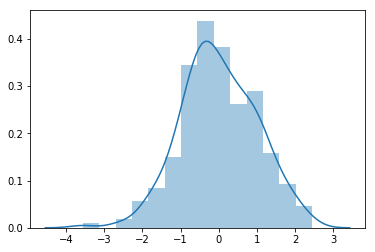

In [3]:
sns.distplot(data)

Remove the line and replace with a "rug plot" - mark all data points on axis with small "ticks"

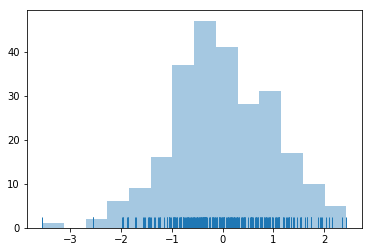

In [4]:
sns.distplot(data, kde=False, rug=True)

### set_style
We can easily change the default style for current session. Choose between "white", "dark", "whitegrid", "darkgrid" and "ticks"

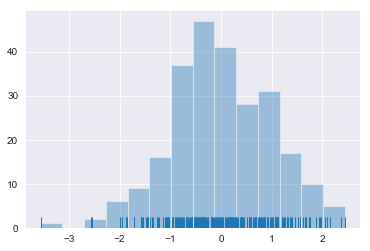

In [5]:
sns.set_style('darkgrid')
sns.distplot(data, kde=False, rug=True)

### set_palette
In the same manner we can specify a default color pallete

In [6]:
sns.set_palette('magma')

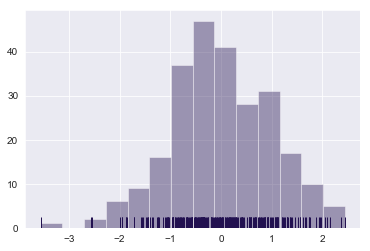

In [7]:
sns.distplot(data, kde=False, rug=True)

## bins
Change the number of bins in visual

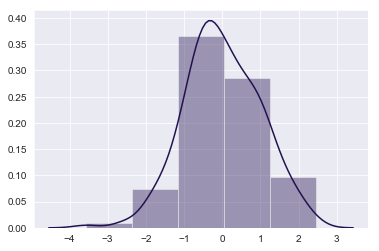

In [8]:
sns.distplot(data, bins=5)

### color
Change color of entire visual

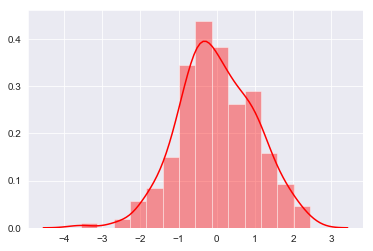

In [9]:
sns.distplot(data, color='red')

### color_palette
We can define our own color pallettes or use pre-made pallettes from Matplotlib

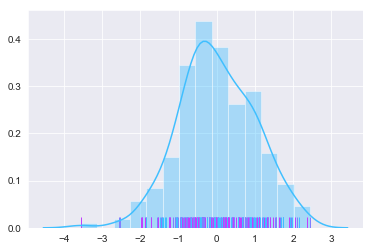

In [10]:
colors = sns.color_palette('cool',n_colors=3).as_hex()
sns.distplot(data, color=colors[0],rug=True, rug_kws={'color':colors})

### load_dataset()
Use this method to access Seaborn's built-in library of data sets. We can use the ***get_dataset_names*** method to review all data sets that are currently available. This method requires to ***bs4*** library to be installed for the successful fetching of this data

In [49]:
sns.get_dataset_names()

c:\python\python3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file c:\python\python3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [11]:
flight_data = sns.load_dataset('flights')
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


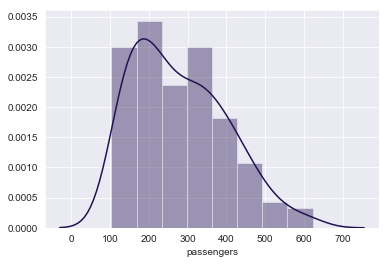

In [12]:
sns.distplot(flight_data['passengers'])

### violinplot
Another viz type to visualize value frequency

In [13]:
passengers = flight_data['passengers']
year = flight_data['year']

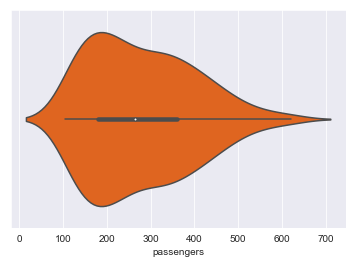

In [15]:
sns.violinplot(x=passengers, palette='hot')

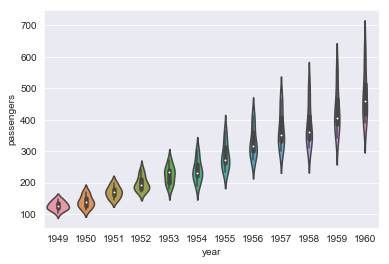

In [19]:
sns.violinplot(x=year,y=passengers)

### swarmplot

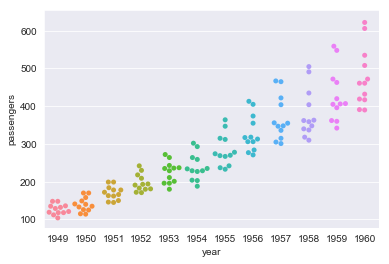

In [17]:
sns.swarmplot(x=year, y=passengers)

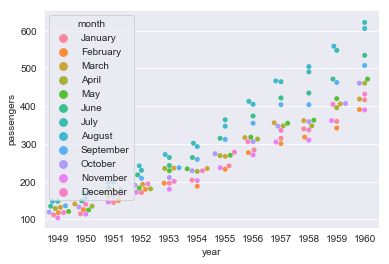

In [18]:
sns.swarmplot(x=year, y=passengers, hue=flight_data['month'])

In [21]:
colors = sns.color_palette('magma', n_colors=12).as_hex()
colors

['#0d0a29',
 '#271258',
 '#491078',
 '#671b80',
 '#862781',
 '#a6317d',
 '#c53c74',
 '#e34e65',
 '#f66c5c',
 '#fc9065',
 '#feb67c',
 '#fdda9c']

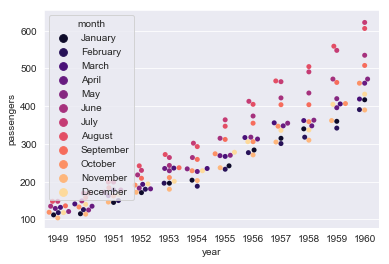

In [22]:
sns.swarmplot(x=year, y=passengers, hue=flight_data['month'],palette=colors)

### catplot

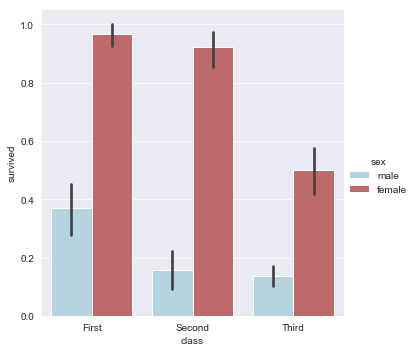

In [28]:
titanic = sns.load_dataset("titanic")
colors = ['lightblue', 'indianred']

sns.catplot(x="class", y="survived", hue="sex", data=titanic, kind="bar", palette=colors, legend=True)

### scatterplot()

In [29]:
cars = sns.load_dataset('mpg')
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


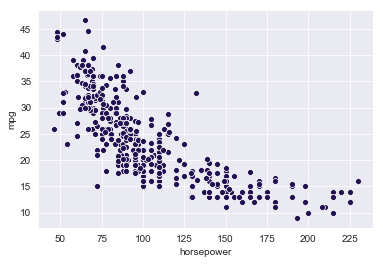

In [34]:
sns.scatterplot(x=cars['horsepower'],y=cars['mpg'])

### data
By using the ***data*** argument we can specify our dataframe once and just specify the column names for the rest of the arguments

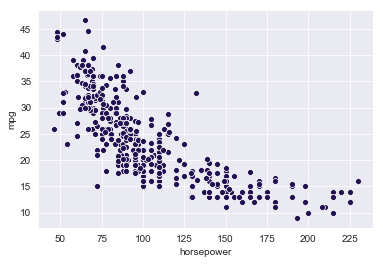

In [35]:
sns.scatterplot(x='horsepower',y='mpg', data=cars)

### hue
Let's add categorical coloring to our scatter plot

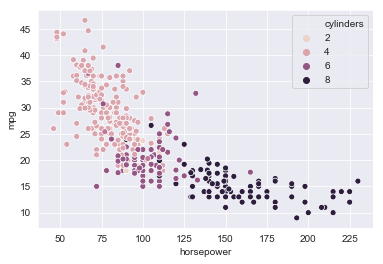

In [36]:
sns.scatterplot(x='horsepower',y='mpg', data=cars, hue='cylinders')

Change the coloring palette

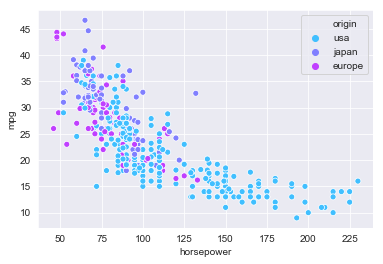

In [37]:
sns.scatterplot(x='horsepower',y='mpg', data=cars, hue='origin', palette='cool')

### size
Add a 4th dimension by attaching the size of the markers to another column

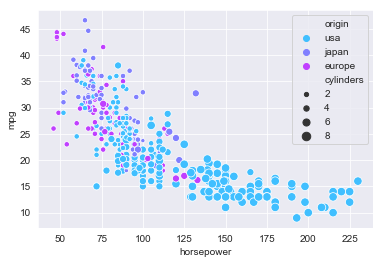

In [38]:
sns.scatterplot(x='horsepower',y='mpg', data=cars, hue='origin', palette='cool', size='cylinders')

### jointplot

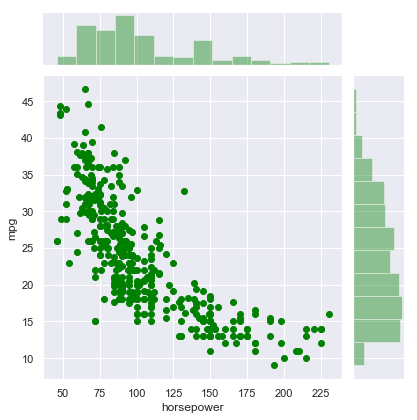

In [53]:
sns.jointplot(data=cars, x='horsepower',y='mpg',color='green')

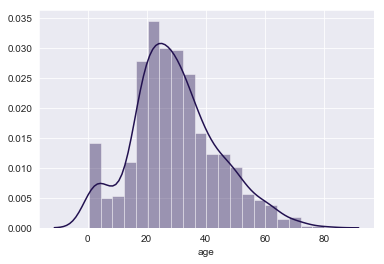

In [42]:
age = titanic[titanic['age'].notnull()]['age']
sns.distplot(a=age)

In [43]:
sns.set_context('poster')

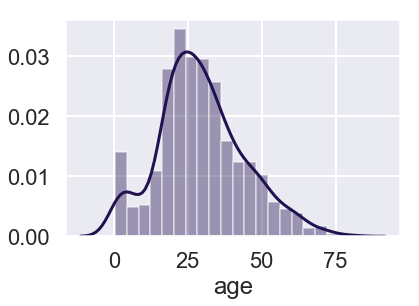

In [44]:
sns.distplot(a=age)

In [45]:
sns.set_context('notebook')

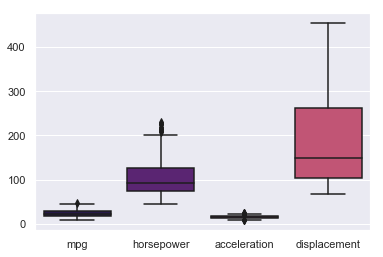

In [61]:
sns.boxplot(data=cars[['mpg','horsepower','acceleration','displacement']])

### heatmap()
Creating heatmap from column correlations

In [63]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


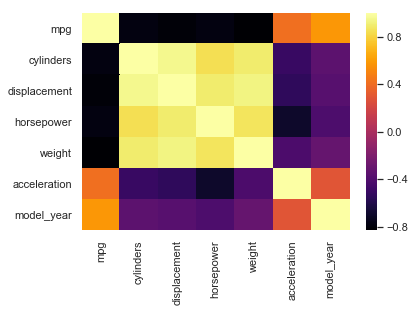

In [74]:
sns.heatmap(cars.corr(), cmap='inferno')

In [77]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

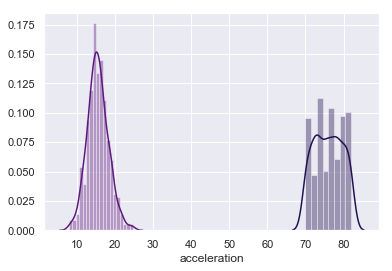

In [82]:
sns.distplot(cars['model_year'])
sns.distplot(cars['acceleration'])